### PAIR II MÓDULO 3: Test Estadísticos

Para los ejercicios de Pair hemos utilizado el siguiente dataset: [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [23]:
df = pd.read_pickle('data/spotify_songs_limpio.pkl')
df.head(3)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,196571,False,0.544,0.689,C,-7.764,minor,0.246,0.147,0.00000,0.1510,0.422,87.328,compas_4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,139093,False,0.725,0.604,G,-5.874,major,0.408,0.117,0.00000,0.0855,0.449,199.995,compas_4,dancehall
2,36NwMJRaCy7x77xYGJiG2M,Allman Brothers Band,Fishing Music,Midnight Rider,1,177960,False,0.346,0.589,G,-9.922,major,0.036,0.210,0.00703,0.1500,0.638,189.486,compas_4,hard-rock


1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?
- Error Tipo I: Es rechazar la hipótesis nula (H0) cuando es verdadera
- Error Tipo II: Es aceptar la hipótesis nula (H0) cuando es falsa

2. ¿Qué es la asimetría?
- La falta de simetría en una distribución (muestra sesgada hacia la izquierda o hacia la derecha).

3. ¿Es vuestra variable respuesta asimétrica?

In [24]:
df["popularity"].skew()

0.03935085342108236

- Según el skew, la muestra está un poco sesgada hacia la derecha. Por comprobarlo de manera visual:

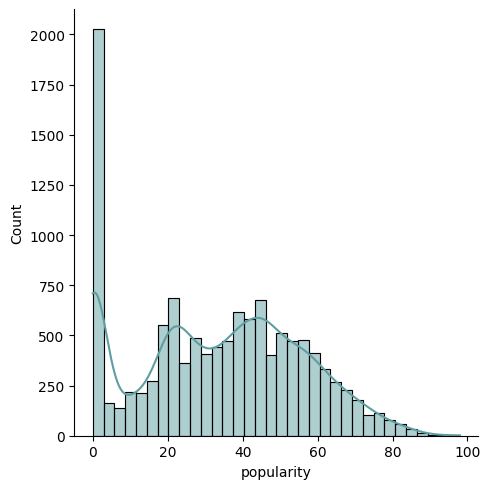

In [25]:
sns.displot(df["popularity"], kde=True, color="cadetblue");

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [26]:
kurtosistest(df["popularity"])

KurtosistestResult(statistic=-42.40280670445713, pvalue=0.0)

- La pvalue es < 0, por lo que la gráfica es platicúrtica.

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [27]:
# Vamos a ver primero la muestra que tenemos para ver si usar Shapiro o Kolmogorov-Smirnov:

df.shape

(12000, 20)

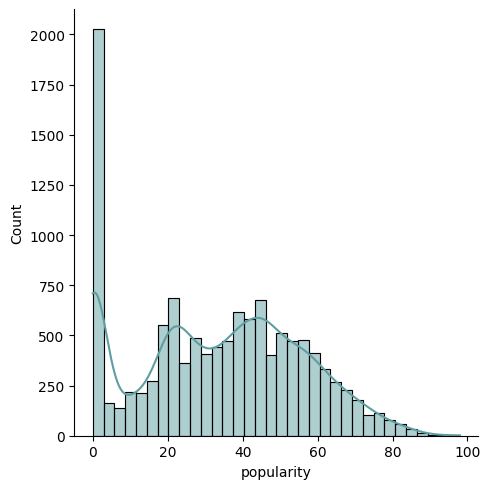

In [28]:
# Visualmente:
sns.displot(df["popularity"], kde=True, color="cadetblue");

In [29]:
# Vamos a usar KS porque nuestra muestra > 50:
kstest(df["popularity"], 'norm')

KstestResult(statistic=0.8299001019683698, pvalue=0.0, statistic_location=3, statistic_sign=-1)

- Nuestra variable inicial es no normal (pvalue < 0.05) por lo que no podremos utilizarla como variable respuesta ahora mismo en una regresión lineal.

In [30]:
# Vamos a comprobar cuáles de nuestras variables son normales:

numericas = df.select_dtypes(np.number)
columnas_numeric = numericas.columns

normales = []
no_normales = []

for colum in columnas_numeric:
    pvalue = kstest(df[colum], 'norm')[1]
    if pvalue > 0.05:
        normales.append(f'{colum} (pvalue = {pvalue})')
    else:
        no_normales.append(f'{colum} (pvalue = {pvalue})')

print(f'Son normales las columnas:\n {normales} (pvalues > 0.05)')
print(f'Son no normales las columnas:\n {no_normales} (pvalues < 0.05)')

Son normales las columnas:
 [] (pvalues > 0.05)
Son no normales las columnas:
 ['popularity (pvalue = 0.0)', 'duration_ms (pvalue = 0.0)', 'danceability (pvalue = 0.0)', 'energy (pvalue = 0.0)', 'loudness (pvalue = 0.0)', 'speechiness (pvalue = 0.0)', 'acousticness (pvalue = 0.0)', 'instrumentalness (pvalue = 0.0)', 'liveness (pvalue = 0.0)', 'valence (pvalue = 0.0)', 'tempo (pvalue = 0.0)'] (pvalues < 0.05)


No tenemos ninguna variable numérica de tipo normal.